# CSE351 HW2: Prediction/Modelling
## Predict electricity usage based on weather conditions
**Iman Ali (112204305)**

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


## Load the data

In [2]:
# Use pandas to load data frames
energy_data = pd.read_csv('energy_data.csv')
weather_data = pd.read_csv('weather_data.csv')

## Task 1

### (Examine data, parse time fields, sum energy usage per day & merge with weather data)

In [3]:
############################################ Examine the data #####################################################

# Display first 5 rows of the energy dataset
energy_data.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [11]:
# Display first 5 rows of the weather dataset
weather_data.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0


In [12]:
# A concise summary of the Energy DataFrame. 
# Check which properties are being represented and what their types are.
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date & Time                      17520 non-null  object 
 1   use [kW]                         17520 non-null  float64
 2   gen [kW]                         17520 non-null  float64
 3   Grid [kW]                        17520 non-null  float64
 4   AC [kW]                          17520 non-null  float64
 5   Furnace [kW]                     17520 non-null  float64
 6   Cellar Lights [kW]               17520 non-null  float64
 7   Washer [kW]                      17520 non-null  float64
 8   First Floor lights [kW]          17520 non-null  float64
 9   Utility Rm + Basement Bath [kW]  17520 non-null  float64
 10  Garage outlets [kW]              17520 non-null  float64
 11  MBed + KBed outlets [kW]         17520 non-null  float64
 12  Dryer + egauge [kW

In [13]:
# A concise summary of the Weather DataFrame. 
# Check which properties are being represented and what their types are.
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        8760 non-null   float64
 1   icon               8760 non-null   object 
 2   humidity           8760 non-null   float64
 3   visibility         8760 non-null   float64
 4   summary            8760 non-null   object 
 5   pressure           8760 non-null   float64
 6   windSpeed          8760 non-null   float64
 7   cloudCover         7290 non-null   float64
 8   time               8760 non-null   int64  
 9   windBearing        8760 non-null   int64  
 10  precipIntensity    8760 non-null   float64
 11  dewPoint           8760 non-null   float64
 12  precipProbability  8760 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 889.8+ KB


In [14]:
############################################ Parse time fields ####################################################

########## Energy Data ###########
# Extract time from 'Date & Time' field (Add it as a new field)
energy_data['time'] = pd.to_datetime(energy_data['Date & Time']).dt.time
energy_data.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],time
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589,00:00:00
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008,00:30:00
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928,01:00:00
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472,01:30:00
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798,02:00:00


In [15]:
########## Weather Data ###########

# First convert 'time' to 'Date & Time' format so it is compatible with energy_data (adding as new field)
weather_data['Date & Time'] = pd.to_datetime(weather_data['time'], unit="s")

# Then extract time from it (same as energy_data time format HH:mm::ss)
weather_data['time'] = weather_data['Date & Time'].dt.time
weather_data.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,00:00:00,279,0.0,23.89,0.0,2014-01-01 00:00:00
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,01:00:00,195,0.0,5.87,0.0,2014-01-01 01:00:00
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,02:00:00,222,0.0,6.17,0.0,2014-01-01 02:00:00
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,03:00:00,209,0.0,5.63,0.0,2014-01-01 03:00:00
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,04:00:00,217,0.0,5.87,0.0,2014-01-01 04:00:00


In [16]:
############################## Sum energy usage (Use [kW]) to get per day usage ###################################

# To get per day usage, we first need to group the energy_data rows by date.
# To do that, we need to extract date from the 'Date & Time' field and add it as another column.
energy_data['Date'] = pd.to_datetime(energy_data['Date & Time']).dt.normalize()
energy_data.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],time,Date
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589,00:00:00,2014-01-01
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008,00:30:00,2014-01-01
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928,01:00:00,2014-01-01
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472,01:30:00,2014-01-01
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798,02:00:00,2014-01-01


In [17]:
# Now group by date and sum the energy usage
daily_usage = energy_data.groupby("Date")
daily_usage = daily_usage[['use [kW]']].sum()
daily_usage

,use [kW]
Date,
2014-01-01,65.013592
2014-01-02,32.305336
2014-01-03,31.164468
2014-01-04,45.287782
2014-01-05,36.316643
...,...
2014-12-27,35.046127
2014-12-28,37.695824
2014-12-29,28.675929


In [18]:
##################################### Merge daily usage with weather data #########################################

# We have already calculated the daily usage, but now we need to get daily weather data.
# Therefore group weather data by date and take averge of values.

# To do that, extract date from 'Date & Time' field (adding it as new column)
weather_data['Date'] = pd.to_datetime(weather_data['Date & Time']).dt.normalize()
weather_data.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time,Date
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,00:00:00,279,0.0,23.89,0.0,2014-01-01 00:00:00,2014-01-01
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,01:00:00,195,0.0,5.87,0.0,2014-01-01 01:00:00,2014-01-01
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,02:00:00,222,0.0,6.17,0.0,2014-01-01 02:00:00,2014-01-01
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,03:00:00,209,0.0,5.63,0.0,2014-01-01 03:00:00,2014-01-01
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,04:00:00,217,0.0,5.87,0.0,2014-01-01 04:00:00,2014-01-01


In [19]:
# Group weather data by date and mean over all numeric values
daily_weather = weather_data.groupby("Date").mean()
daily_weather

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
Date,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...
2014-12-27,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000
2014-12-28,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,224.458333,0.003996,34.876250,0.137917
2014-12-29,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000


In [20]:
# Merge daily_usage with daily_weather
daily_data = pd.merge(daily_usage, daily_weather, on="Date")
daily_data

,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
Date,,,,,,,,,,,
2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,35.046127,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000
2014-12-28,37.695824,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,224.458333,0.003996,34.876250,0.137917
2014-12-29,28.675929,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000


## Task 2
### (Split into training and testing sets)

In [21]:
# Training set => day in January - November
# Testing set => days in December

# Extract training set
training = daily_data[daily_data.index < '2014-12-01']

# Target variable 'use [kW]' as y
# Therefore Y_train has values of 'use [kw]', and X_train with all other fields
Y_train = training[['use [kW]']]
X_train = training.loc[:, training.columns != 'use [kW]']


# Display X_train
X_train

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
Date,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...
2014-11-26,36.385000,0.778333,6.551667,1019.266250,6.445833,0.171333,185.375000,0.024837,29.875417,0.291250
2014-11-27,31.992500,0.847083,7.394583,1012.272917,7.599167,0.420769,316.833333,0.006033,27.862083,0.160417
2014-11-28,29.126250,0.763750,8.919167,1018.359583,6.599167,0.268947,316.416667,0.000271,22.335000,0.006667


In [22]:
# Display Y_train (answers)
Y_train

,use [kW]
Date,
2014-01-01,65.013592
2014-01-02,32.305336
2014-01-03,31.164468
2014-01-04,45.287782
2014-01-05,36.316643
...,...
2014-11-26,27.712850
2014-11-27,30.114004
2014-11-28,26.348404


In [23]:
# Extract testing set (december)
testing = daily_data[daily_data.index >= '2014-12-01']

# Similar to training data,
# Y_test with values of 'use [kw]'', and X_test with all other fields
Y_test = testing[['use [kW]']]
X_test = testing.loc[:, training.columns != 'use [kW]']


# Display X_test
X_test

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
Date,,,,,,,,,,
2014-12-01,45.276250,0.722083,9.656667,1018.805417,6.397083,0.263333,226.958333,0.000000,36.748750,0.000000
2014-12-02,34.177917,0.582917,9.839583,1034.805833,7.527083,0.121818,166.625000,0.000000,21.006250,0.000000
2014-12-03,36.345833,0.911250,4.939167,1022.247500,5.691250,0.862000,119.333333,0.010754,33.994167,0.240833
2014-12-04,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,286.125000,0.000371,22.777500,0.010000
2014-12-05,27.463750,0.698750,9.847083,1035.654167,3.421667,0.069130,63.833333,0.000000,18.462083,0.000000
2014-12-06,34.868750,0.909167,4.692500,1026.207500,3.397083,0.862000,117.791667,0.022008,32.409167,0.476667
2014-12-07,33.502917,0.641667,9.490417,1029.725000,12.755417,0.170952,50.000000,0.009396,21.621250,0.168333
2014-12-08,19.519583,0.562917,9.980833,1039.599583,8.700000,0.062105,15.458333,0.000000,6.322917,0.000000
2014-12-09,30.960417,0.857500,6.005417,1023.523333,10.067500,1.000000,20.000000,0.037779,27.157500,0.342083


In [25]:
# Display Y_test (answers)
Y_test

,use [kW]
Date,
2014-12-01,30.550010
2014-12-02,31.748857
2014-12-03,28.773233
2014-12-04,39.484491
2014-12-05,33.342503
2014-12-06,36.470153
2014-12-07,26.486585
2014-12-08,23.013980
2014-12-09,27.954351


## Task 3 
## (Linear Regression - Predicting Energy Usage)

In [27]:
################################# Set up a simple linear regression model to train ################################

# Use linear regression from the sklearn library 
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Use the coefficient and intercept to determine the y = mx + c linear fit
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [[-4.02705252e+00 -2.11198347e+02 -1.93776964e+00  2.41789567e-02
  -4.99521125e-01 -9.76825808e+00  1.15025311e-02  2.77005490e+02
   4.63844010e+00 -3.45923118e+00]]
Intercept:  [192.0462744]


In [41]:
############################ Predict energy usage for each day in the month of December ############################

# Use the model to predict values of electricty usage for the testing set
usage_pred = lin_reg.predict(X_test)
usage_pred = usage_pred.flatten()
usage_pred

# Check csv dump for predicted values as well.

array([30.43457312, 31.6556055 , 18.30638052, 31.43589939, 23.81815813,
       21.34638909, 22.95965138, 24.90248154, 20.0580725 , 18.53616071,
       19.5070998 , 21.95908842, 25.62554619, 24.56240186, 27.90688889,
       17.04274926, 23.64611421, 26.08520137, 25.60049498, 25.38361334,
       15.0220098 , 13.78488489, 14.2039299 , 16.89665035, 30.40174451,
       34.00289194, 26.72679948, 27.75019123, 30.47762069, 29.75450607,
       25.71173412])

In [42]:
# Actual values vs Predicted
x = pd.DataFrame({'Actual': Y_test['use [kW]'].tolist(),'Predicted': usage_pred })
x

,Actual,Predicted
0,30.550010,30.434573
1,31.748857,31.655605
2,28.773233,18.306381
3,39.484491,31.435899
4,33.342503,23.818158
5,36.470153,21.346389
6,26.486585,22.959651
7,23.013980,24.902482
8,27.954351,20.058072
9,37.422625,18.536161


In [43]:
#################################### How well/badly does the model work ##########################################

# Evaluate the correctness of your predictions based on the original “use [kW]” column
lin_reg.score(X_test, Y_test)

-0.5169732667447056

In [44]:
########################################### Root mean squared error #############################################
mean_squared_error(Y_test, usage_pred, squared=False)

8.740566311136634

In [65]:
# According to the sklearn library:
# Root mean squared error return: the best value is 0.0 

# Lower values of RMSE indicate better fit.
# Since we have quite a high value of 8.74 (not close to zero) that means our model was not the best

# But given that we dont want to overfit or underfit the data by overlearning or underlearning respectively,
# This model does a decent job at predicting the values

In [46]:
##################################### A csv dump of the predicted values ########################################

# Format of csv: Two columns, first date and second predicted value
data = pd.DataFrame({'Date':X_test.index, 'Predicted Usage':usage_pred})
data.to_csv('cse351_hw2_Ali_Iman_112204305_linear_regression.csv')

## Task 4
## Logistic Regression - Temperature classification

In [54]:
# Training set => day in January - November
# Testing set => days in December

# Extract training set (not december)
training = daily_data[daily_data.index < '2014-12-01']

# temperature class that contains 1 for high temp (>=35) and 0 for low temp (< 35)
temperature_class = [1 if temp >= 35 else 0 for temp in training.temperature]

# Target variable 'temperature_class' as y
# This field is not in the data frame, therefore training set will act as the X_train
# And temperature_class array will act as the Y_train
Y_train = temperature_class
X_train = training

# Display X_train
X_train

,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
Date,,,,,,,,,,,
2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...
2014-11-26,27.712850,36.385000,0.778333,6.551667,1019.266250,6.445833,0.171333,185.375000,0.024837,29.875417,0.291250
2014-11-27,30.114004,31.992500,0.847083,7.394583,1012.272917,7.599167,0.420769,316.833333,0.006033,27.862083,0.160417
2014-11-28,26.348404,29.126250,0.763750,8.919167,1018.359583,6.599167,0.268947,316.416667,0.000271,22.335000,0.006667


In [55]:
# Extract testing set (december)
testing = daily_data[daily_data.index >= '2014-12-01']

# Similar to training data, testing data will act as X_test
X_test = testing

# Y_test will be temperature_class of testing set
Y_test = [1 if temp >= 35 else 0 for temp in testing.temperature]

In [56]:
################################### Set up a logistic regression model ###########################################

# Use logistic regression from the sklearn library 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [60]:
############################### Classify temperature class for each day in December ##############################

# Use the model to predict the temperature class (high/low) for the testing set
temp_class_pred = log_reg.predict(X_test)
temp_class_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0])

In [61]:
# Actual values vs Predicted
x = pd.DataFrame({'Actual': Y_test,'Predicted': temp_class_pred })
x

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
5,0,1
6,0,1
7,0,0
8,0,0
9,1,1


In [62]:
############################################# F1 score for the model ##############################################

f1_score(Y_test, temp_class_pred)

0.8148148148148148

In [63]:
# Our logistic regression model did a pretty decent job with a high f1 score of 0.82
# It is pretty close to a perfect score of 1.0

In [64]:
##################################### A csv dump of the predicted values ########################################

# Format of csv: Two columns, first date and second classification
data = pd.DataFrame({'Date':X_test.index, 'Classification':temp_class_pred})
data.to_csv('cse351_hw2_Ali_Iman_112204305_logistic_regression.csv')

## Task 5
## Energy Usage Data Analysis
####  Analyze how different devices are being used in different times of the day

In [422]:
######################################### Divide day in two parts ###############################################

# Day: 6AM - 7PM
# Night: 7PM - 6AM

# Add new field into energy_data frame; 
# 'Time_of_day' which is 1 for day values (6AM - 7PM) and 0 for night values (7PM - 6AM)
start_time = pd.to_datetime("06:00:00").time()
end_time = pd.to_datetime("19:00:00").time()

energy_data['Time_of_day'] = [1 if (time >= start_time and time < end_time) else 0 for time in energy_data.time]
energy_data

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],...,MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],time,Date,Time_of_day
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,...,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589,00:00:00,2014-01-01,0
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,...,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008,00:30:00,2014-01-01,0
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,...,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928,01:00:00,2014-01-01,0
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,...,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472,01:30:00,2014-01-01,0
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,...,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798,02:00:00,2014-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2014-12-31 21:30:00,1.560890,0.0,1.560890,0.003226,0.392996,0.006342,0.000872,0.030453,0.002248,...,0.278941,0.000120,0.000292,0.007983,0.033991,0.003702,0.002906,21:30:00,2014-12-31,0
17516,2014-12-31 22:00:00,0.958447,0.0,0.958447,0.000827,0.027369,0.006326,0.000811,0.030391,0.002543,...,0.243128,0.000139,0.000334,0.006178,0.034535,0.004464,0.113162,22:00:00,2014-12-31,0
17517,2014-12-31 22:30:00,0.834462,0.0,0.834462,0.001438,0.170561,0.020708,0.000636,0.012631,0.002372,...,0.204744,0.000087,0.000341,0.005684,0.034484,0.004502,0.051604,22:30:00,2014-12-31,0
17518,2014-12-31 23:00:00,0.543863,0.0,0.543863,0.001164,0.153533,0.008423,0.000553,0.003832,0.002353,...,0.177276,0.000109,0.000373,0.005160,0.025601,0.004647,0.039409,23:00:00,2014-12-31,0


In [423]:
# Group energy_data by 'Date' and then 'Day'
# Therefore, we get day and night usage of each appliance, every day.
daily_energy = energy_data.groupby(['Date', 'Time_of_day']).sum()
daily_energy

use [kW]  gen [kW]  Grid [kW]   AC [kW]  \
Date       Time_of_day                                             
2014-01-01 0            12.298678       0.0  12.298678  0.023052   
           1            52.714914       0.0  52.714914  0.019924   
2014-01-02 0            14.431601       0.0  14.431601  0.024908   
           1            17.873735       0.0  17.873735  0.022543   
2014-01-03 0            15.012886       0.0  15.012886  0.034788   
...                           ...       ...        ...       ...   
2014-12-29 1            16.587432       0.0  16.587432  0.026391   
2014-12-30 0            12.483430       0.0  12.483430  0.022673   
           1            19.030883       0.0  19.030883  0.039467   
2014-12-31 0            12.313700       0.0  12.313700  0.020520   
           1            16.360798       0.0  16.360798  0.039572   

                        Furnace [kW]  Cellar Lights [kW]  Washer [kW]  \
Date       Time_of_day                                                  
2014-01-01 0                5.267369            0.228123     0.001739   
           1                3.546950            0.909456     0.748558   
2014-01-02 0                5.773027            0.152534     0.003195   
           1                5.057018            0.447786     0.319987   
2014-01-03 0                7.651753            0.164063     0.002160   
...                              ...                 ...          ...   
2014-12-29 1                4.636044            0.281084     0.008696   
2014-12-30 0                2.607011            0.178818     0.014143   
           1                4.676692            0.289003     0.019768   
2014-12-31 0                1.959049            0.195500     0.013403   
           1                6.071546            0.299368     0.012706   

                        First Floor lights [kW]  \
Date       Time_of_day                            
2014-01-01 0                           0.290367   
           1                           0.277236   
2014-01-02 0                           0.273670   
           1                           0.232770   
2014-01-03 0                           0.267454   
...                                         ...   
2014-12-29 1                           0.259604   
2014-12-30 0                           0.346021   
           1                           0.418413   
2014-12-31 0                           0.281958   
           1                           0.277839   

                        Utility Rm + Basement Bath [kW]  Garage outlets [kW]  \
Date       Time_of_day                                                         
2014-01-01 0                                   0.081966             0.128176   
           1                                   0.096563             0.132919   
2014-01-02 0                                   0.080879             0.108843   
           1                                   0.097145             0.173636   
2014-01-03 0                                   0.079331             0.109704   
...                                                 ...                  ...   
2014-12-29 1                                   0.059228             0.165482   
2014-12-30 0                                   0.053230             0.109751   
           1                                   0.062703             0.128526   
2014-12-31 0                                   0.054343             0.114571   
           1                                   0.060571             0.158827   

                        MBed + KBed outlets [kW]  Dryer + egauge [kW]  \
Date       Time_of_day                                                  
2014-01-01 0                            0.203036             0.001726   
           1                            0.051803            31.936406   
2014-01-02 0                            0.203546             2.865573   
           1                            0.594769             2.558293   
2014-01-03 0                            0.45673

In [424]:
########################################### Usage of any two devices ##############################################

# We will analyze the usage of 'Microwave' and 'Fridge' during the ‘day’ and ‘night’

usage_data = daily_energy[['Microwave (R) [kW]', 'Fridge (R) [kW]']]
usage_data

Microwave (R) [kW]  Fridge (R) [kW]
Date       Time_of_day                                     
2014-01-01 0                      0.174531         1.838567
           1                      4.822506         2.801031
2014-01-02 0                      0.246948         1.752190
           1                      1.287477         2.129209
2014-01-03 0                      0.186699         1.374413
...                                    ...              ...
2014-12-29 1                      0.175263         1.638169
2014-12-30 0                      0.148389         1.987023
           1                      0.475354         2.568554
2014-12-31 0                      0.102798         1.295786
           1                      0.410912         1.822229

[730 rows x 2 columns]

In [425]:
# Get total usage (sum) of microwave and fridge for day and night

day_usage_sum = usage_data.groupby('Time_of_day').sum()
day_usage_sum['Total Usage [kW]'] = day_usage_sum['Microwave (R) [kW]'] + day_usage_sum['Fridge (R) [kW]']
day_usage_sum

,Microwave (R) [kW],Fridge (R) [kW],Total Usage [kW]
Time_of_day,,,
0,64.127094,567.035208,631.162302
1,202.830316,721.761017,924.591333


Text(0, 0.5, 'Total Usage [kW]')

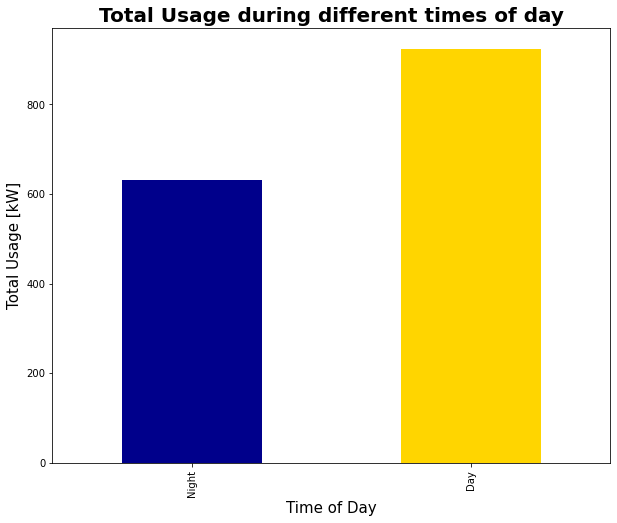

In [426]:
# Visualization: plot Total Usage (sum of both applainces) during different times of the day

graph = day_usage_sum.plot.bar(y='Total Usage [kW]', figsize=(10,8), legend=False, color=['#00008B','#FFD500'])
plt.title("Total Usage during different times of day",fontweight='bold', fontsize=20)
graph.set_xticklabels(["Night", "Day"])
graph.set_xlabel("Time of Day", fontsize=15)
graph.set_ylabel("Total Usage [kW]", fontsize=15)

In [427]:
# Findings:

# Total usage is greater during the day as compared to the night.
# Appliances are being used more frequently from 6AM to 7PM

# Explanation: This is a very expected result because people use more appliances when they are awake in the day
# as compared to asleep during the night.

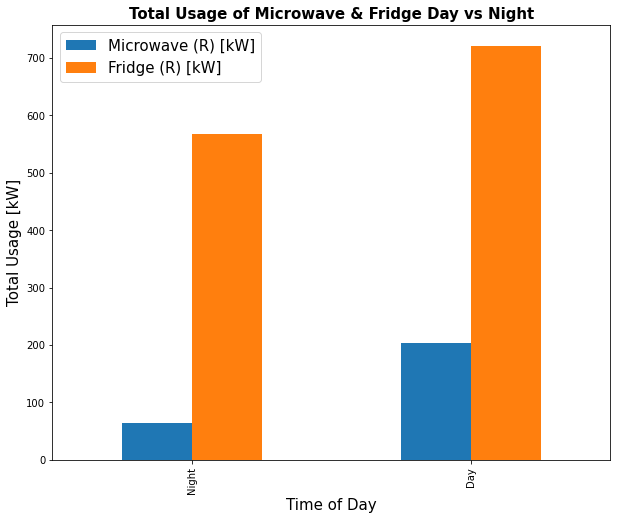

In [428]:
# Visualization: plot total usage of each appliance day and night

graph = day_usage_sum.plot.bar(y=day_usage_sum.index, figsize=(10,8))
plt.title("Total Usage of Microwave & Fridge Day vs Night",fontweight='bold', fontsize=15)
graph.set_xticklabels(["Night", "Day"])
graph.set_xlabel("Time of Day", fontsize=15)
graph.set_ylabel("Total Usage [kW]", fontsize=15)
graph.legend(loc=2, prop={'size': 15})

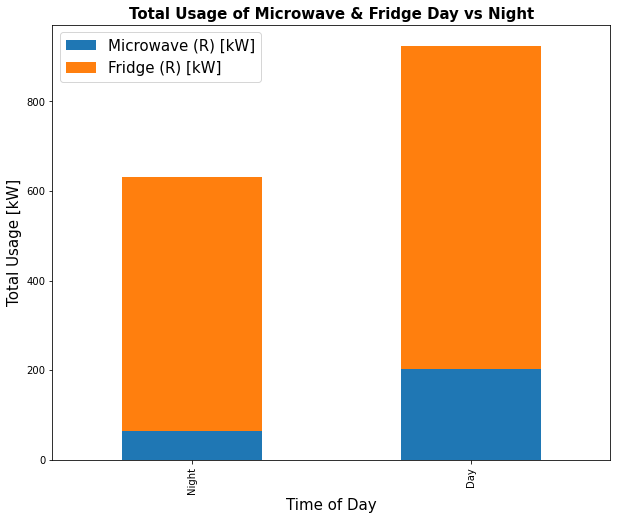

In [429]:
# Visualization: Same as graph above, but different visualization
# Usage of both appliances stacked on top of each other, showing total usage also.

graph = day_usage_sum.plot.bar(y=day_usage_sum.index, stacked=True, figsize=(10,8))
plt.title("Total Usage of Microwave & Fridge Day vs Night",fontweight='bold', fontsize=15)
graph.set_xticklabels(["Night", "Day"])
graph.set_xlabel("Time of Day", fontsize=15)
graph.set_ylabel("Total Usage [kW]", fontsize=15)
graph.legend(loc=2, prop={'size': 15})

In [430]:
# Findings:

# The above 2 bargraphs show that both the Fridge and Microwave are being used during the day as well as the night.

# However, for both, the usage is greater during the day as compared to night time.

# We can also conclude that the usage of fridge is much more compared to the microwave, irrespective of 
# time of day.

# Explanation: Again, more people are awake during the day and use more devices, such as the microwave to heat 
# their food.
# The fact that fridges are always using electricty to maintain a low temperature inside must be a major factor  
# contributing to usage during the night and also having more usage than the microwave.

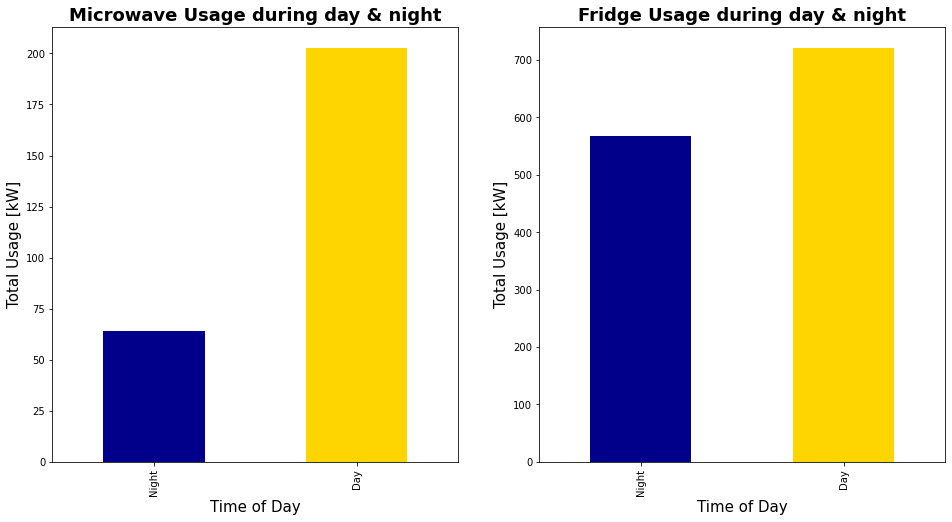

In [431]:
# Visualization: Compare Usage during different times of the day

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))


# Microwave
ax1 = day_usage_sum.plot.bar(y='Microwave (R) [kW]', ax=ax1, legend=False, 
                             color=['#00008B','#FFD500'], title="Microwave Usage during day & night")
ax1.set_xticklabels(["Night", "Day"])
ax1.set_xlabel("Time of Day", fontsize=15)
ax1.set_ylabel("Total Usage [kW]", fontsize=15)


# Fridge
ax2 = day_usage_sum.plot.bar(y='Fridge (R) [kW]', ax=ax2, legend=False, 
                             color=['#00008B','#FFD500'], title="Fridge Usage during day & night")
ax2.set_xticklabels(["Night", "Day"])
ax2.set_xlabel("Time of Day", fontsize=15)
ax2.set_ylabel("Total Usage [kW]", fontsize=15)

ax1.title.set_size(18)
ax1.title.set_weight('bold')
ax2.title.set_size(18)
ax2.title.set_weight('bold')

In [432]:
# Findings:

# Microwave has skewed distribution of usage. 
# Much more usage during day compared to night

# Explanation:
# Awake people warming up food compared to sleeping individuals

# Fridge has much more even distrbution of usage.

# Explanation:
# Almost same amount of electricity required to keep the temperature low and maintain it.

In [433]:
# Visualization: Scatter plot to check spread of data

scatter = usage_data.reset_index()
day_scatter = scatter[scatter['Time_of_day'] == 1]
day_scatter

,Date,Time_of_day,Microwave (R) [kW],Fridge (R) [kW]
1,2014-01-01,1,4.822506,2.801031
3,2014-01-02,1,1.287477,2.129209
5,2014-01-03,1,1.480854,2.296978
7,2014-01-04,1,0.868637,2.015632
9,2014-01-05,1,1.306940,2.326453
...,...,...,...,...
721,2014-12-27,1,0.397695,1.934659
723,2014-12-28,1,0.119816,1.932823
725,2014-12-29,1,0.175263,1.638169
727,2014-12-30,1,0.475354,2.568554


In [434]:
night_scatter = scatter[scatter['Time_of_day'] == 0]
night_scatter

,Date,Time_of_day,Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01,0,0.174531,1.838567
2,2014-01-02,0,0.246948,1.752190
4,2014-01-03,0,0.186699,1.374413
6,2014-01-04,0,0.160561,1.342275
8,2014-01-05,0,0.313051,2.047277
...,...,...,...,...
720,2014-12-27,0,0.244811,1.904993
722,2014-12-28,0,0.191741,1.577613
724,2014-12-29,0,0.104661,2.064418
726,2014-12-30,0,0.148389,1.987023


Text(0.5, 1.0, 'Microwave Usage spread during day')

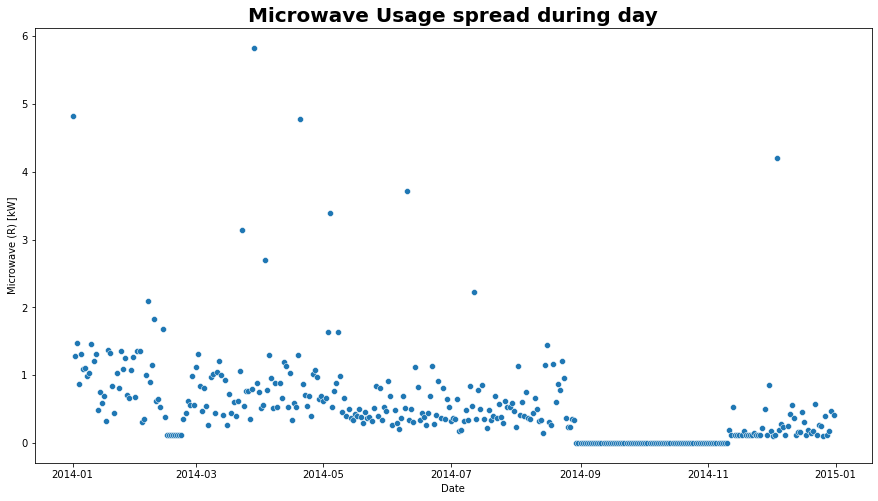

In [435]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=day_scatter['Date'], y=day_scatter['Microwave (R) [kW]'])
plt.title("Microwave Usage spread during day", fontsize=20, fontweight='bold')

In [ ]:
# Findings:

# Microwave usage during the day stays at a low steady pace most of the time.
# This might be because the microwave is plugged in at all times and is using a small amount of 
# electricty for the display lights etc
# There are some peaks in the electrcity usage during the day indicating usage of the microwave to 
# heat up food (which is not very often but only at meal times).

Text(0.5, 1.0, 'Microwave Usage spread during night')

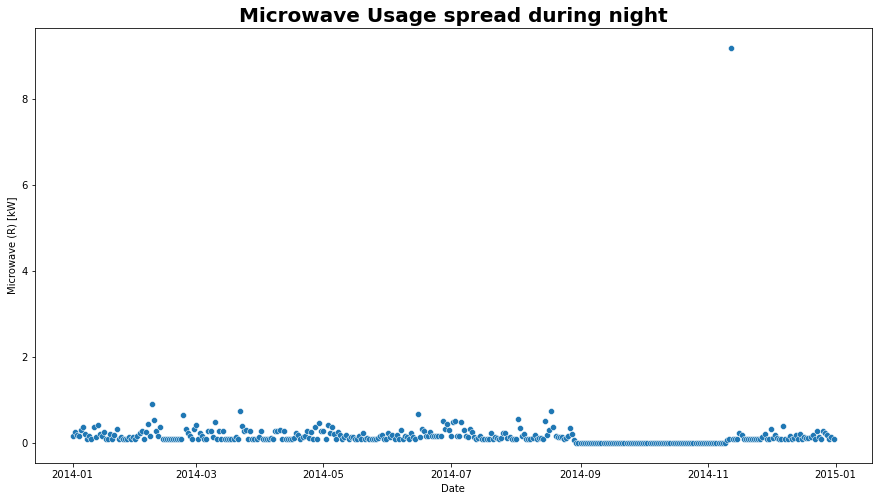

In [436]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=night_scatter['Date'], y=night_scatter['Microwave (R) [kW]'])
plt.title("Microwave Usage spread during night", fontsize=20, fontweight='bold')

In [437]:
# Findings:

# However, during the night, the microwave only requires a little steady electricity while being plugged into 
# the power. There are no fluctuations or peaks during the night time meaning no one wants to heat food at night.
# There is one anomoly in the night scatter plot, which might be an error while gathering data.

Text(0.5, 1.0, 'Fridge Usage spread during day')

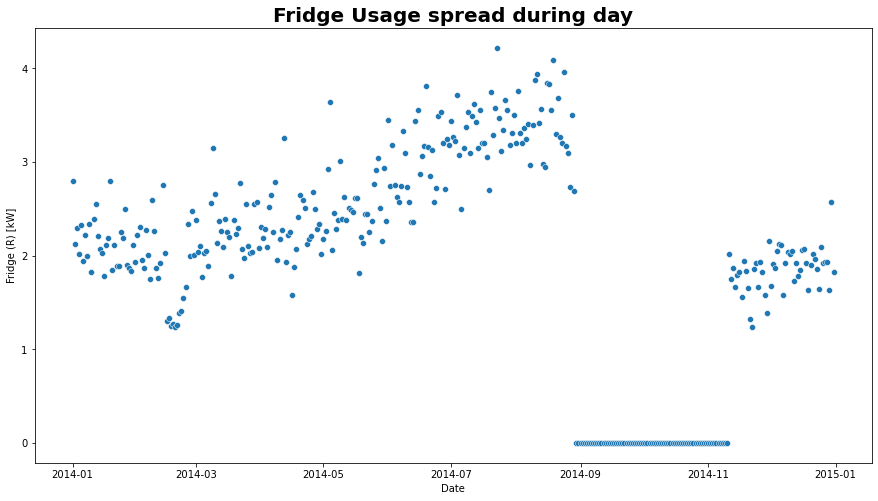

In [438]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=day_scatter['Date'], y=day_scatter['Fridge (R) [kW]'])
plt.title("Fridge Usage spread during day", fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Fridge Usage spread during night')

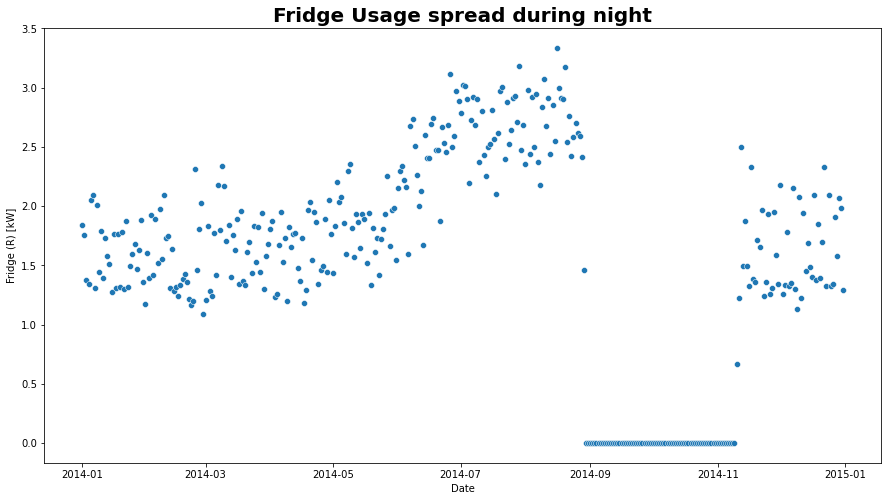

In [439]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=night_scatter['Date'], y=night_scatter['Fridge (R) [kW]'])
plt.title("Fridge Usage spread during night", fontsize=20, fontweight='bold')

In [66]:
# Findings:

# Fridge mostly has the same spread of data during the night and day.
# The fridge is plugged into power at all times and uses about the same electricty to keep a low temperature
# inside, irrespective of the time of the day.
# However, generally the usage is less during the night (3 kW) compared to day (4kW) because maybe
# people open the fridge door more often during the day and the fridge reqires more electricty to maintain
# the cool temperature unlike when poeple are asleep at night and no one opens the firdge door and therefore no 
# cool air is lost.


# In both the scatter plots for the microwave and fridge, there is zero usage from 2014-09 to 2014-11, 
# This can be due to multiple reasons for example stop gathering data, or damage to the device that 
# is recording the voltage use etc.